# Microsoft Movie Analysis


* Student name: Jennifer Casias
* Student pace: full time
* Scheduled project review date/time: 01/27/2023
* Instructor name: Brendan Hutchinson


# Overview

   Microsoft has created a new movie studio to create original video content. My job is to assist Microsoft in
   exploring what types of films are currently doing the best at the box office. Then, translate those findings into
   actionable insights. These insights will help Microsoft's new movie studio create a profitable business. 

### Business Understanding

1. Think like a savvy Microsoft stakeholder!
    * Conceptualize key business questions:
        1. Does production budget affect gross income?
        2. What is the return on income?
        3. What are the most profitable genres?
        4. Which months take in the most revenue? 
2. Find patterns and trends in datasets to uncover insights.
3. Make Billy G proud!

### Let's get started!

First, import cleaning and analysis programs.

In [1]:
# Import packages
import pandas as pd
import sqlite3 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
%matplotlib inline

Next, import movie datasets.

In [2]:
# Import dataframes

# Box Office Mojo
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_gross = pd.DataFrame(bom_gross)

# Import Rotten Tomatoes Info
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

# Import Rotten Tomatoes Reviews
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t',encoding= 'unicode_escape')

# Import TheMovieDb
movie_db = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_db = pd.DataFrame(movie_db)

# Import The Numbers
# Import tn.movie_budgets.csv dataset
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_budgets = pd.DataFrame(tn_budgets)

Finally, import IMBD SQL dataset.

In [3]:
# Import IMDB
con = sqlite3.connect('zippedData/im.db2')
table_q = '''SELECT name 
             FROM sqlite_master 
             WHERE type='table';'''
pd.read_sql(table_q, con)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Next, import all of IMDB's fields. There are 8 total.

In [4]:
# 1: Import movie_basics
movie_basics_df = pd.read_sql("""

SELECT * 
FROM movie_basics

""", con)

# 2: Import directors 
directors_df = pd.read_sql("""

SELECT * 
FROM directors

""", con)

# 3: Import known_for
known_for_df = pd.read_sql("""

SELECT * 
FROM known_for

""", con)

# 4: Import movie_akas
movie_akas_df = pd.read_sql("""

SELECT * 
FROM movie_akas

""", con)

# 5: Import movie_ratings
movie_ratings_df = pd.read_sql("""

SELECT * 
FROM movie_ratings

""", con)

# 6: Import persons
persons_df = pd.read_sql("""

SELECT * 
FROM persons

""", con)

# 7: Import principals
principals_df = pd.read_sql("""

SELECT * 
FROM principals

""", con)

# 8: Import writers
writers_df = pd.read_sql("""

SELECT * 
FROM writers

""", con)

Great! Now that all the datasets have been imported. Let's look at what's inside. 

In [5]:
# Box Office Mojo
bom_gross.info()

# Rotten Tomatoes Info
rt_info.info()

# Rotten Tomatoes Reviews
rt_reviews.info()

# TheMovieDb
movie_db.info()

# The Numbers
tn_budgets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-nu

Next, let's look at what's inside the SQL dataset. 
* See 'movie_data_erd.jpeg' to quickly find column names.

In [6]:
# movie_basics
movie_basics_df.info()

# directors
directors_df.info()

# known_for
known_for_df.info()

# movie_akas
movie_akas_df.info()

# movie_ratings
movie_ratings_df.info()

# persons
persons_df.info()

# principals
principals_df.info()

# writers
writers_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count

### Data Preparation

#### Part One: 

First, start cleaning the datasets.

In [7]:
# Box Office Mojo

# Drop unnecessary columns
bom_gross.drop(['studio'], axis=1, inplace=True)

# Clean years
bom_gross['year'] = pd.to_datetime(bom_gross['year'], format='%Y')
bom_gross['year'] = pd.DatetimeIndex(bom_gross['year']).year

# Rename columns
bom_gross.rename(columns={"foreign_gross": "worldwide_gross"}, inplace=True)

# Clean budgets by repalcing nulls and converting to integers
bom_gross['worldwide_gross'] = bom_gross['worldwide_gross'].fillna(bom_gross['domestic_gross'])
bom_gross['domestic_gross'] = bom_gross['domestic_gross'].fillna(bom_gross['worldwide_gross']).astype(np.int64)
bom_gross['worldwide_gross'] = bom_gross['worldwide_gross'].replace('[\,.]', '', regex=True).astype(np.int64)

In [8]:
# The Numbers

# Drop unnecessary columns
tn_budgets.drop(['id'], axis=1, inplace=True)

# Rename columns
tn_budgets.rename(columns={"movie": "title", "release_date": "year"}, inplace=True)

# Clean years
tn_budgets["year"] = tn_budgets["year"].astype('datetime64[ns]')
tn_budgets['year'] = pd.to_datetime(tn_budgets['year'], format='%Y')
tn_budgets['year'] = pd.DatetimeIndex(tn_budgets['year']).year

#Clean budgets, drop null values, convert to int
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].fillna(0)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].fillna(0)
tn_budgets['production_budget'] = tn_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(np.int64)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(np.int64)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(np.int64)

Now, merge Box Office Mojo and The Numbers.

In [9]:
# Merge and drop null values
bom_tn = bom_gross.merge(tn_budgets, how = 'outer')
bom_tn = bom_tn[bom_tn['production_budget'].notna()]
bom_tn.drop(bom_tn.loc[bom_tn['domestic_gross']==0].index, inplace=True)
bom_tn['production_budget'] = bom_tn['production_budget'].astype(np.int64)

Let's keep it relevant! Keep films that are only from the last decade. 

In [10]:
# Drop films older than 10 years
bom_tn = bom_tn[bom_tn.year > 2003]

Great! We narrowed the data to 3095 rows from 5234.

This is good but I think it would be even more helpful to find out the actual return on their investment.

#### Add additional columns

Step 1: Find the profit by subtracting production_budget from worldwide_gross.

In [11]:
# Creat a column for profit
bom_tn['profit'] = bom_tn['worldwide_gross'] - bom_tn['production_budget']

Step 2: Find the Return on Investment(ROI) by dividing profit from production_budget.

In [12]:
# Create a column for ROI
bom_tn['ROI'] = bom_tn['profit']/bom_tn['production_budget']

### Part Two:

Start by merging Rotten Tomatoes Reviews and Rotten Tomatoes Info.  Then, clean the data.

In [13]:
# Merge RT Reviews and RT Info
rt = pd.merge(rt_reviews,rt_info,on='id')

# Check for null values
rt = rt[rt['rating_x'].notnull()]
rt = rt[rt['box_office'].notnull()]

# Get rid of commas, divide genres up
rt['box_office'] = rt['box_office'].str.replace(',','').apply(lambda x: int(x))
rt['genre'] = rt['genre'].str.split('|')

A little bit of column exploring... 

First, taking a look at directors.

In [14]:
# What are the top directors?

# To find this out I need the name of the director in relation to the highest box office sales
# Drop duplicates
directors = rt[['director','box_office']].drop_duplicates()

# Some movies have multiple directors
# For my analysis I will need to grab each one for count
directors['director'] = directors['director'].str.split('|')
directors = directors.explode('director')

# Top 5 directors 
directors.sort_values('box_office', ascending=False).head(5)

,director,box_office
26581,Mel Gibson,368000000
28440,Peter Jackson,303001229
39981,Sam Mendes,299300000
21985,Jay Roach,279167575
36952,Chris Columbus,261835892


Also, looking at genres.

In [15]:
# What are the top genres?

# Rename columns
genre = rt.explode('genre')
genre = genre.rename(columns={'box_office':'box_office_revenue'})
genre = genre.rename(columns={'rating_x':'rating'})

When to release a movie...

In [16]:
# What months have the highest box office numbers? 

# Narrow theater date to it's month 
rt['release_month'] = rt['theater_date'].astype(str).apply(lambda x: x[0:3])

monthly = rt.groupby('release_month')['box_office'].mean().reset_index()

monthly = monthly[0:12]

# Clean the data
monthly['release_month'] = monthly['release_month'].apply(lambda x: 'January' if x=='Jan'\
                                                         else 'February' if x=='Feb'\
                                                         else 'March' if x=='Mar'\
                                                         else 'April' if x=='Apr'\
                                                         else 'May' if x=='May'\
                                                         else 'June' if x=='Jun'\
                                                         else 'July' if x=='Jul'\
                                                         else 'August' if x=='Aug'\
                                                         else 'September' if x=='Sep'\
                                                         else 'October' if x=='Oct'\
                                                         else 'November' if x=='Nov'\
                                                         else 'December' if x=='Dec'\
                                                         else x)
# Assign the number to it's corresponding month
monthly['month_no'] = monthly['release_month'].apply(lambda x: 1 if x=='January'\
                                                         else 2 if x=='February'\
                                                         else 3 if x=='March'\
                                                         else 4 if x=='April'\
                                                         else 5 if x=='May'\
                                                         else 6 if x=='June'\
                                                         else 7 if x=='July'\
                                                         else 8 if x=='August'\
                                                         else 9 if x=='September'\
                                                         else 10 if x=='October'\
                                                         else 11 if x=='November'\
                                                         else 12 if x=='December'\
                                                         else x)



In [17]:
rt['box_office'].describe()

count    2.553800e+04
mean     5.358717e+07
std      6.904309e+07
min      3.630000e+02
25%      6.100613e+06
50%      2.750368e+07
75%      7.422362e+07
max      3.680000e+08
Name: box_office, dtype: float64

Creating a new dataframe showing for profitable month visualization. 

In [18]:
final = rt[['genre', 'box_office', 'release_month']].explode('genre')
final.head()
genre_revenue = final.groupby(['release_month'])['box_office'].mean().sort_values(ascending=True)
genre_revenue.sort_values()

release_month
nan    1.583277e+06
May    1.897498e+07
Aug    2.751045e+07
Sep    3.094511e+07
Oct    3.868424e+07
Jan    3.987524e+07
Mar    4.620082e+07
Apr    5.473191e+07
Jul    6.334815e+07
Feb    6.776136e+07
Dec    6.898558e+07
Nov    7.421973e+07
Jun    8.564908e+07
Name: box_office, dtype: float64

In [19]:
# Merge movie_basics_df from IMDB to the first merge (Box Office Mojo and The Numbers)
merge_df = movie_basics_df.merge(bom_tn, how = 'inner' , left_on = ['primary_title', 'start_year'], right_on =['title', 'year'])

# Drop null values
merge_df.dropna(inplace = True)

# Seperate genres
merge_df['genre1'] = merge_df['genres'].apply(lambda x: x.split(',')[0])

## Data Visualization 

### Visual 1: Return on Investment

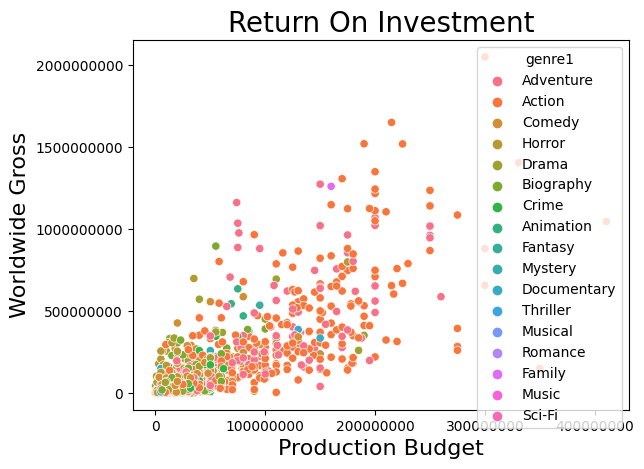

In [20]:
sns.scatterplot(data=merge_df, x='production_budget', y='worldwide_gross', hue='genre1', sizes=(30,70))
plt.title('Return On Investment', fontsize=20)
plt.xlabel('Production Budget', fontsize=16)
plt.ylabel('Worldwide Gross', fontsize=16)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y');

Correlation is somewhere between strong, positive, linear. Can also see which genres are really profitable. Will narrow this down later.

### Visual 2: Production Budget vs. Worldwide Gross 

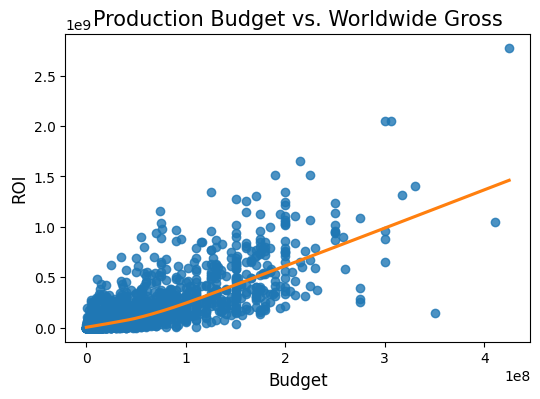

In [21]:
# How about a regressional plot?
#A regression plot with dollar-value-additive of production investment:
from matplotlib import rcParams
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(bom_tn['production_budget'],bom_tn['worldwide_gross'])
fig, ax = plt.subplots(figsize = ( 6, 4))
sns.regplot(x="production_budget", y="worldwide_gross", data=bom_tn, lowess=True, line_kws={"color": "C1"});
ax.set_xlabel( "Budget" , size = 12 )
ax.set_ylabel( "ROI" , size = 12 )
ax.set_title( "Production Budget vs. Worldwide Gross" , size = 15 )
plt.show()

### Visual 3:  Months that bring in the most revenue

<function matplotlib.pyplot.show(close=None, block=None)>

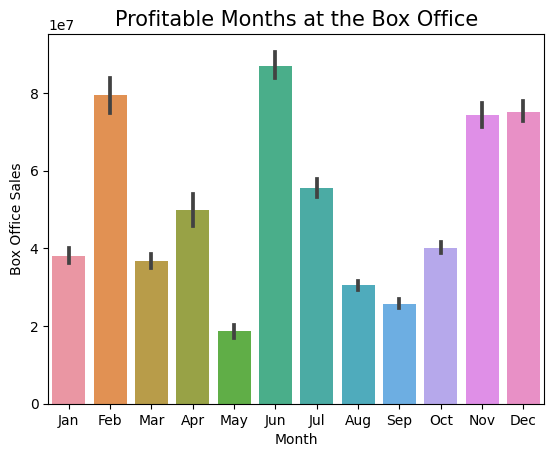

In [23]:
# A bar plot showing most profitable months
# order=Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x='release_month', y='box_office', data=rt, order=months)
plt.title('Profitable Months at the Box Office', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Box Office Sales', fontsize=10)
plt.show

### Visual 4: Box Office Revenue by Genre

According to Rotten Tomatoes dataset.

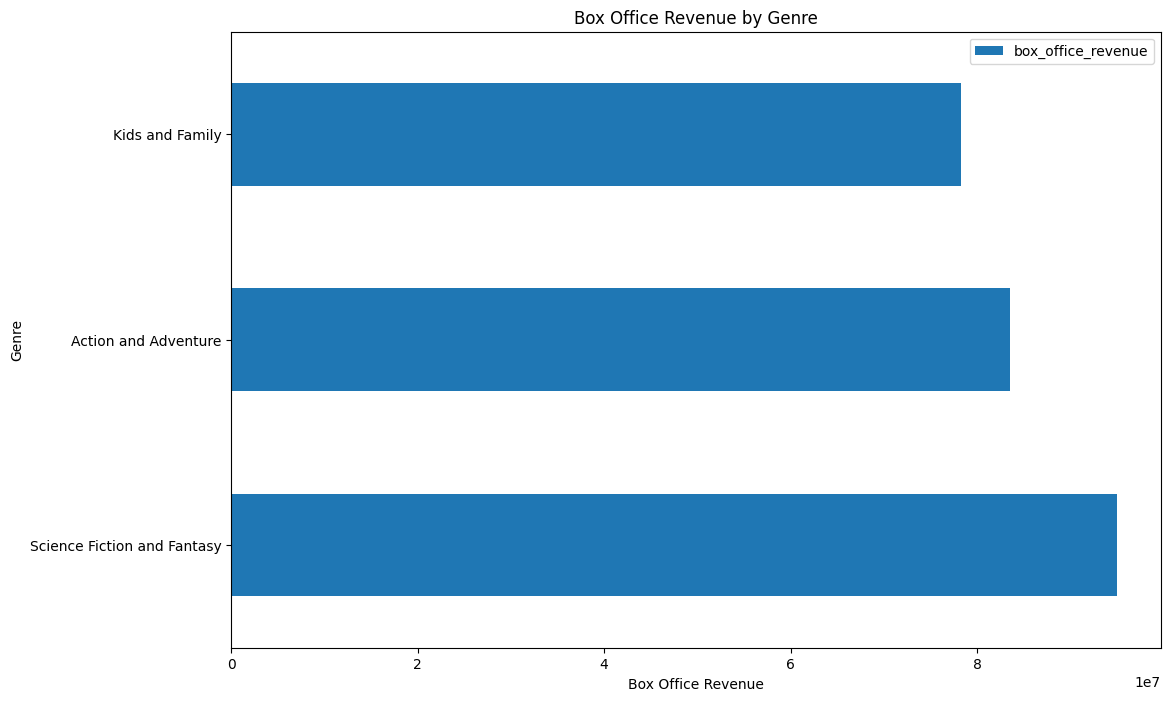

In [27]:
genre_revenue = genre.groupby('genre')['box_office_revenue'].mean().reset_index()
genre_revenue = genre_revenue.sort_values(by='box_office_revenue', ascending=False).head(3)
genre_revenue['box_office_revenue'] = genre_revenue['box_office_revenue'] 
genre_revenue.plot(x='genre',y='box_office_revenue',kind='barh',figsize=(12,8))
plt.title('Box Office Revenue by Genre')
plt.xlabel('Box Office Revenue')
plt.ylabel('Genre')
plt.show()

### Visual 5: A pair plot of domestic gross, worldwide gross, and production budget

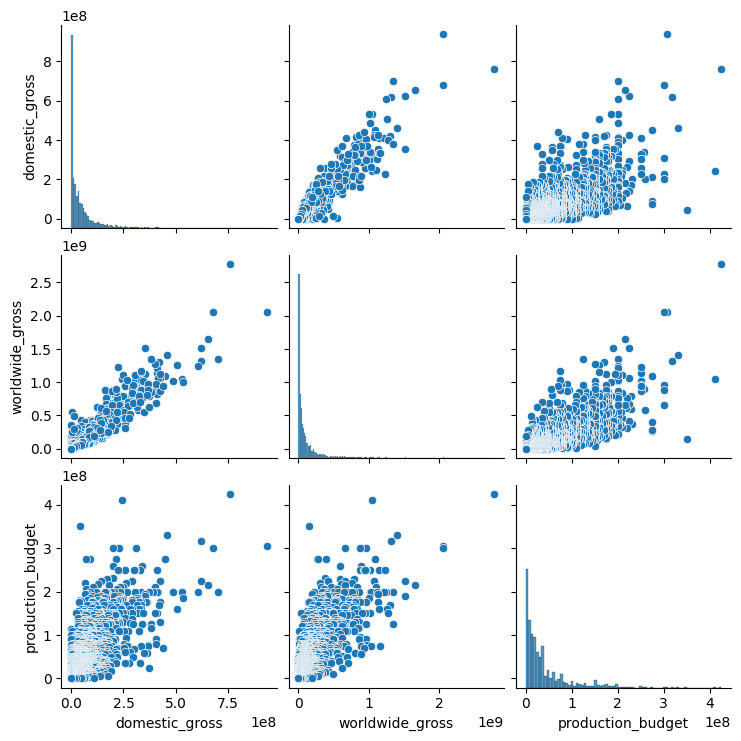

In [29]:
sns.pairplot(bom_tn, vars=['domestic_gross', 'worldwide_gross', 'production_budget'])
plt.show()

### Visual 6: Most profitable genres according to IMDB, Box Office Mojo, and The Numbers

In [31]:
# Genres in order by profit
merge_df['genre1'].value_counts()

Action         405
Comedy         265
Drama          236
Adventure      151
Biography      110
Horror          68
Crime           66
Documentary     31
Fantasy          6
Animation        6
Mystery          4
Thriller         3
Family           2
Musical          1
Romance          1
Music            1
Sci-Fi           1
Name: genre1, dtype: int64

Text(0.5, 1.0, 'Most Profitable Genres')

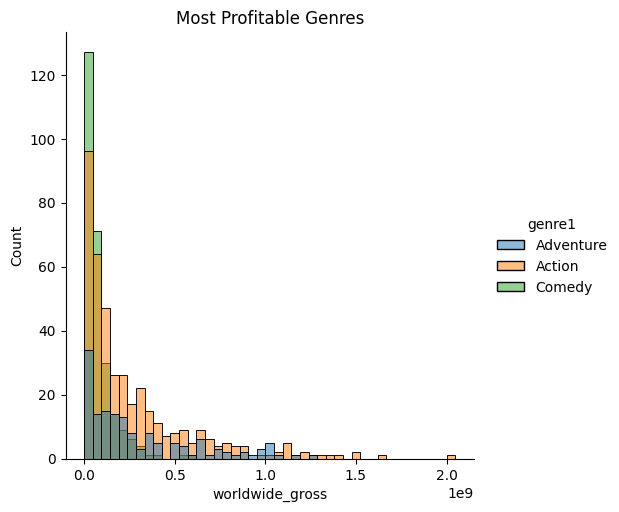

In [32]:
# Distribution plot of the top 3 profitable genres
genres = ['Adventure', 'Action', 'Comedy']
sns.displot(data = merge_df.loc[merge_df['genre1'].isin(genres)], x = 'worldwide_gross', hue= 'genre1')
plt.title('Most Profitable Genres')

# Conclusion

Starting the project I wanted to find out how much money will Microsoft need to budget to receive the max amount of profit. I also wanted to find out what genre of movie performs the best at the box office as well as the best time to release. 

### Insights

1. Budget and Revenue are positively correlated, However, high budget does not guarantee high revenue.
2. Peak months to release
    * June-July
    * Nov-Dec
    * Feb
3. Genres to consider
    * Adventure
    * Action
    * Comedy

The analysis of the movie dataset revealed several insights about the movie industry as well as leading to more questions.  From improvement ideas, I would to know more about who is making up the box office numbers. 